In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob
import xgboost

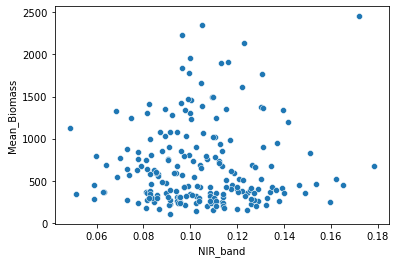

In [15]:
##Proof of concept
os.chdir(r'C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/')
df = pd.read_csv('GA_spectra_FINAL_3-4-22.csv') ##very different results than GA_spectra

df

g = sns.scatterplot(x = 'NIR_band', y = 'Mean_Biomass', data = df)
plt.show()

In [16]:
##REMEMBER: by combining landsat 5 and 8 bands, you are grouping bands with slightly different wavelengths. ADDRESS
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##needs so much work
# df.fillna(df.mean(), inplace=True) ##getting rid of NaN values, but not sure if this is okay

xargs=df[['ndvi', 'Blue_band', 'Green_band', 'Red_band', 'NIR_band', 'SWIR1_band', 'SWIR2_band']] 
yargs=df['Mean_Biomass'] 

# ##Split dataset into training set and test set
# seed = 7
# test_size = 0.33
# xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=test_size, random_state=seed)
# ##Not sure what random_state = seed does

# ##fit model no training data
# model = XGBClassifier()
# model.fit(xargs_train, yargs_train)
# print(model)

# ##make predictions for test data
# y_pred = model.predict(xargs_test)
# predictions = [round(value) for value in y_pred]

# accuracy = accuracy_score(yargs_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=0.3) # 70% training and 30% test

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

##Create a Gaussian Classifier
reg_x=RandomForestRegressor(n_estimators=100, random_state = 0) ##Not sure what random_state = 0 does

##Train the model using the training sets y_pred=clf.predict(X_test)
reg_x.fit(xargs_train, yargs_train)
y_pred=reg_x.predict(xargs_test)

score(xargs, y_pred)

X_grid = np.arange(min(xargs),max(xargs),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(xargs,yargs, color='red') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='blue') #plotting for predict points
plt.show()

NameError: name 'score' is not defined

In [17]:
##From: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

X = df[['ndvi', 'Blue_band', 'Green_band', 'Red_band', 'NIR_band', 'SWIR1_band', 'SWIR2_band']] 

##add to dataframe: df[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi']] 

y = df['Mean_Biomass']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r_square = metrics.r2_score(y_test, y_pred)
print(r_square) ##pretty low (0.29), all things considered

print(regressor.score(X_test, y_test))


Mean Absolute Error: 395.82463568027197
Mean Squared Error: 270366.01503399125
Root Mean Squared Error: 519.9673211212328
-0.1988631545270123
-0.1988631545270123


ValueError: x and y must be the same size

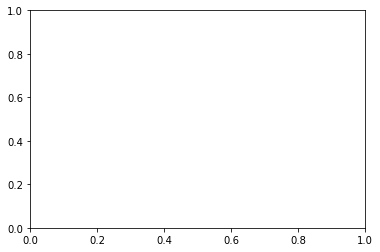

In [18]:
##Visualization
plt.scatter(xargs,yargs, color='red') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='blue') #plotting for predict points
plt.show()